In [4]:
import numpy as np
import pandas as pd
from twitter import Twitter
from twitter import OAuth
import Twitter_Credential
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [5]:
 # set access token and secret 
oauth = OAuth(Twitter_Credential.accesstoken,Twitter_Credential.accesstokensecret,Twitter_Credential.apikey,Twitter_Credential.apisecretkey) 
api=Twitter(auth=oauth)
api

In [6]:
t_loc=api.trends.available()
t_loc

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [7]:
class TwitterClient(object):
    def __init__(self):
        try:
            self.oauth = OAuth(Twitter_Credential.accesstoken,Twitter_Credential.accesstokensecret,Twitter_Credential.apikey,Twitter_Credential.apisecretkey) 
            self.api=Twitter(auth=self.oauth)
            #self.t_loc=api.trends.available()
            #self.df_json_norm=json_normalize(t_loc)
           # print('api=',self.api)
        except:
            print("Error: Authentication Failed")
    def get_trend(self):
        t_loc=self.api.trends.available()
        return json_normalize(t_loc)
    def get_country_5trend(self):
        t_loc=self.api.trends.available()
        df_json_norm=json_normalize(t_loc)
        return df_json_norm['country'].value_counts()[df_json_norm['country'].value_counts()>=3]
    def get_country_trend(self, v_country):
        t_loc=self.api.trends.available()
        df_json_norm=json_normalize(t_loc)
        df_country=df_json_norm[df_json_norm['country'].str.contains(v_country)]
        return df_country

In [8]:
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    print("calling trend function")
    df_json_norm = api.get_trend() #t_locn=json_trend, dfloc=df_json_norm
    #df_json_norm=json_normalize(json_trend)
    
    print(df_json_norm.head())
    print("\n The country wise trend who has more than 5 trends:\n")
    #print(df_json_norm.country.value_counts()>5)
    #trend_counts = df_json_norm['country'].value_counts().rename('trend_counts')
    #df_json_norm=df_json_norm.merge(trend_counts.to_frame(),left_on='country',right_index=True)
    #print(df_json_norm['country'].value_counts()[df_json_norm['country'].value_counts()>=5])
    country_trend_5=api.get_country_5trend()
    print(country_trend_5[:])
    #print(df_json_norm[df_json_norm.trend_counts>=5].country.value_counts())
    #country_trend_5.plot.bar()
    #plt.show()
if __name__== "__main__": 
    # calling main function 
    main()

calling trend function
        name                                       url  parentid country  \
0  Worldwide     http://where.yahooapis.com/v1/place/1         0           
1   Winnipeg  http://where.yahooapis.com/v1/place/2972  23424775  Canada   
2     Ottawa  http://where.yahooapis.com/v1/place/3369  23424775  Canada   
3     Quebec  http://where.yahooapis.com/v1/place/3444  23424775  Canada   
4   Montreal  http://where.yahooapis.com/v1/place/3534  23424775  Canada   

   woeid countryCode  placeType.code placeType.name  
0      1        None              19      Supername  
1   2972          CA               7           Town  
2   3369          CA               7           Town  
3   3444          CA               7           Town  
4   3534          CA               7           Town  

 The country wise trend who has more than 5 trends:

United States           64
United Kingdom          27
Mexico                  24
India                   22
Japan                   22
Russia 

### Displaying the country wise trend 

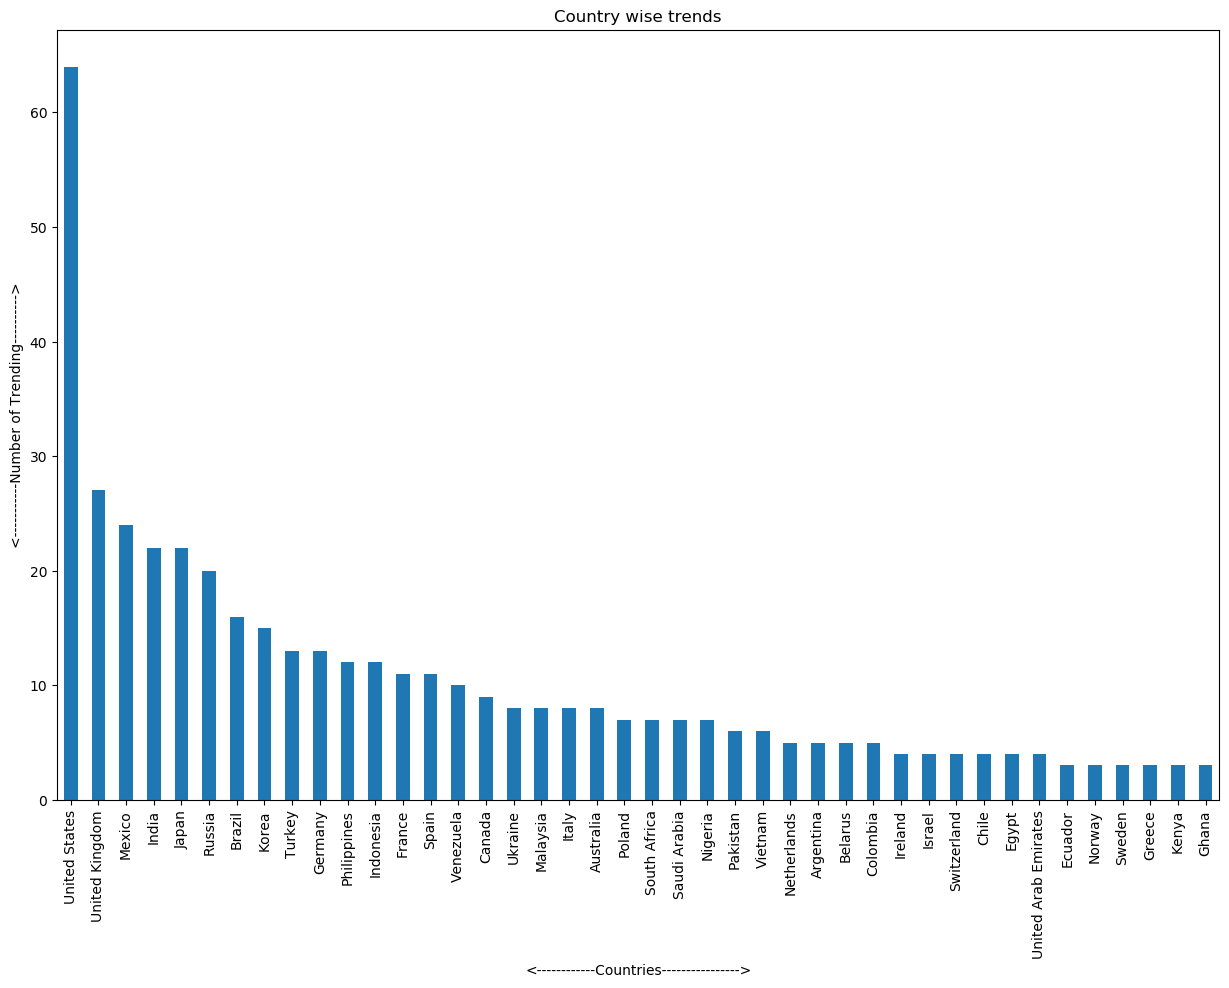

In [9]:
api1 = TwitterClient() 
country_trend_5=api1.get_country_5trend()
fig=plt.figure(figsize=(15,10))
plt.title('Country wise trends')
plt.ylabel('<-----------Number of Trending---------->')
plt.xlabel('<------------Countries---------------->')
country_trend_5.plot.bar()
plt.show()
fig.savefig('plot.png')

In [6]:
country_search = TwitterClient() 
#v_country=input("Please enter any country to check the trends")
v_country='United State'
df_country=country_search.get_country_trend(v_country)
print(df_country.columns)

Index(['country', 'countryCode', 'name', 'parentid', 'placeType.code',
       'placeType.name', 'url', 'woeid'],
      dtype='object')


In [7]:
df_country[['country','name','woeid']].head()

,country,name,woeid
335,United States,Albuquerque,2352824
336,United States,Atlanta,2357024
337,United States,Austin,2357536
338,United States,Baltimore,2358820
339,United States,Baton Rouge,2359991


In [8]:
df_country_cities=df_country[['name','woeid']]
print(df_country_cities.count())
df_country_cities.head()

name     64
woeid    64
dtype: int64


,name,woeid
335,Albuquerque,2352824
336,Atlanta,2357024
337,Austin,2357536
338,Baltimore,2358820
339,Baton Rouge,2359991


In [9]:
ny=df_country_cities.loc[df_country_cities.name=='New York','woeid']
ny.values[0]

2459115

In [10]:
ny_trend=api.trends.place(_id=ny.values[0])
print(type(ny_trend))
ny_trend

<class 'twitter.api.TwitterListResponse'>


[{'trends': [{'name': '#October1st',
    'url': 'http://twitter.com/search?q=%23October1st',
    'promoted_content': None,
    'query': '%23October1st',
    'tweet_volume': 153949},
   {'name': 'Steelers',
    'url': 'http://twitter.com/search?q=Steelers',
    'promoted_content': None,
    'query': 'Steelers',
    'tweet_volume': 101189},
   {'name': 'Bengals',
    'url': 'http://twitter.com/search?q=Bengals',
    'promoted_content': None,
    'query': 'Bengals',
    'tweet_volume': 86431},
   {'name': 'Halloween',
    'url': 'http://twitter.com/search?q=Halloween',
    'promoted_content': None,
    'query': 'Halloween',
    'tweet_volume': 478903},
   {'name': 'Green Day',
    'url': 'http://twitter.com/search?q=%22Green+Day%22',
    'promoted_content': None,
    'query': '%22Green+Day%22',
    'tweet_volume': 25251},
   {'name': '#90DayFiance',
    'url': 'http://twitter.com/search?q=%2390DayFiance',
    'promoted_content': None,
    'query': '%2390DayFiance',
    'tweet_volume': Non

In [11]:
dfny=json_normalize(ny_trend)
dfny

,as_of,created_at,locations,trends
0,2019-10-01T17:38:43Z,2019-10-01T17:29:22Z,"[{'name': 'New York', 'woeid': 2459115}]","[{'name': '#October1st', 'url': 'http://twitte..."


In [12]:
json_normalize(dfny.trends.values[0]).head(5)

,name,promoted_content,query,tweet_volume,url
0,#October1st,None,%23October1st,153949.0,http://twitter.com/search?q=%23October1st
1,Steelers,None,Steelers,101189.0,http://twitter.com/search?q=Steelers
2,Bengals,None,Bengals,86431.0,http://twitter.com/search?q=Bengals
3,Halloween,None,Halloween,478903.0,http://twitter.com/search?q=Halloween
4,Green Day,None,%22Green+Day%22,25251.0,http://twitter.com/search?q=%22Green+Day%22


In [55]:
json_normalize(dfny.trends.values[0])['name']

0                      #ThisIsUs
1                  #NewAmsterdam
2                          #RHOC
3                   Nancy Pelosi
4                  #ImpeachTrump
5                          Greta
6                          Messi
7                President Trump
8                     Mario Kart
9     #Trump2020LandslideVictory
10                   Carson King
11                 Jack Flaherty
12                     Rich Hill
13           Des Moines Register
14                       Mystics
15                         Floro
16                      John Yoo
17                  Bryce Harper
18                  Aaron Calvin
19                  jose ramirez
20                    Quinn Cook
21                       Vannett
22                   Ji-Man Choi
23                       Gearrin
24                  Brian Dozier
25                    Chris Hahn
26                          Tosh
27                  Luke Willson
28                       #SDLive
29                    #Greenleaf
30        

In [35]:
citi_series=pd.series()
for ind in df_country_cities.index: 
     print(df_country_cities['name'][ind], df_country_cities['woeid'][ind]) 

Albuquerque 2352824
Atlanta 2357024
Austin 2357536
Baltimore 2358820
Baton Rouge 2359991
Birmingham 2364559
Boston 2367105
Charlotte 2378426
Chicago 2379574
Cincinnati 2380358
Cleveland 2381475
Colorado Springs 2383489
Columbus 2383660
Dallas-Ft. Worth 2388929
Denver 2391279
Detroit 2391585
El Paso 2397816
Fresno 2407517
Greensboro 2414469
Harrisburg 2418046
Honolulu 2423945
Houston 2424766
Indianapolis 2427032
Jackson 2428184
Jacksonville 2428344
Kansas City 2430683
Las Vegas 2436704
Long Beach 2441472
Los Angeles 2442047
Louisville 2442327
Memphis 2449323
Mesa 2449808
Miami 2450022
Milwaukee 2451822
Minneapolis 2452078
Nashville 2457170
New Haven 2458410
New Orleans 2458833
New York 2459115
Norfolk 2460389
Oklahoma City 2464592
Omaha 2465512
Orlando 2466256
Philadelphia 2471217
Phoenix 2471390
Pittsburgh 2473224
Portland 2475687
Providence 2477058
Raleigh 2478307
Richmond 2480894
Sacramento 2486340
St. Louis 2486982
Salt Lake City 2487610
San Antonio 2487796
San Diego 2487889
San Fra

In [13]:
results = api.trends.place(_id = 23424975)#23424977

print("UK Trends")
for location in results:
    for trend in location["trends"]:
        print(" - %s" % trend["name"])

UK Trends
 - Priti Patel
 - #BirdsOfPrey
 - Club Brugge
 - #RMABRU
 - #JoSwinsonIsATory
 - #freecosta
 - Courtois
 - #BestWaysToEndAnArgument
 - Percy Tau
 - Suicide Squad
 - The Thick of It
 - Margot Robbie
 - Mignolet
 - Sir Geoffrey Clifton-Brown
 - Black Mask
 - Nissan
 - Ewan McGregor
 - Paula Radcliffe
 - Towcester
 - Jonathan Edwards
 - Amber Guyger
 - Kiko
 - PS Now
 - Casilla
 - Law and Order
 - Todd Phillips
 - Moorgate
 - Michael Bay
 - dishonored 2
 - Gigi Hadid
 - #Inktober2019
 - #Shadowkeep
 - #DavidoHot8Giveaway
 - #NationalBlackDogDay
 - #TOTFCB
 - #Banksy
 - #WorldVegetarianDay
 - #PMQs
 - #thunder
 - #escapetothecountry
 - #NoDisposableCups
 - #6Underground
 - #TuesdayTruths
 - #MathsWeekGlasgow
 - #bbcpm
 - #IDOP2019
 - #fromnewcastle
 - #X019
 - #breastcancerawareness
 - #SPEqualProtection


In [14]:
results = api.trends.place(_id = 23424977)

print("United States Trends")

for location in results:
    for trend in location["trends"]:
        print(" - %s" % trend["name"])

United States Trends
 - amber guyger
 - Shaq
 - #BirdsOfPrey
 - Dame
 - #October1st
 - Botham Jean
 - #Inktober2019
 - #TuesdayThoughts
 - #IAmTheWhistleblower
 - FAFSA
 - Zuckerberg
 - Suicide Squad
 - Jimmy Carter
 - Michael Bay
 - Happy Halloween
 - Ewan McGregor
 - Castle Doctrine
 - Lucas Vazquez
 - Club Brugge
 - Grassley
 - Even in Miami
 - Navas
 - Damian Lillard
 - #VegasStrong
 - #BestWaysToEndAnArgument
 - #Shadowkeep
 - #ruinafilmbyaddingupyourbum
 - #NewsEngagementDay
 - #HowDoMexicansTalk
 - #TTAZZ
 - #DeliverDiGiorno
 - #breastcancerawareness
 - #InsteadOfVaping
 - #ProbioticPower
 - #NetNeutrality
 - #WePlayLoud
 - #NationalBlackDogDay
 - #InfinixHot8
 - #ChampionsLeague
 - #InternationalCoffeeDay
 - #HRTechConf
 - #WorldVegetarianDay
 - #DVAM2019
 - #sweettalk


In [15]:
results = api.trends.place(_id = 23424848)

print("India Trends")

for location in results:
    for trend in location["trends"]:
        print(" - %s" % trend["name"])
results = api.trends.place(_id = 23424977)



India Trends
 - #1MonthForSRKDay
 - #WarReleasingTomorrow
 - #BirdsOfPrey
 - #SyeRaaFromTomorrow
 - #ISupportDevendra
 - Courtois
 - SWIFT
 - Avinash Sable
 - Rs 91,916
 - Ford
 - Akhil Singhal
 - Citizenship
 - dawn
 - International Monetary Fund
 - Full Face
 - NRC in Bengal
 - Pakistan and Bangladesh
 - Jhatka
 - #GoBackAmitShah
 - #ENPT
 - #NitishDrownsBihar
 - #SparklingSidIsha
 - #SayYesToToken
 - #21stcenturyrss
 - #RMABRU
 - #RMCLU
 - #GandhiAt150
 - #NRCIsComing
 - #BlessingsForANewLife
 - #WoWAvatar
 - #AAPScam
 - #LalBahadurShastriJayanti
 - #wewantkannadigamayor
 - #UnpackYourDreams
 - #AntonyJoinsThalapathy64
 - #9YearsOfBlockBusterENTHIRAN
 - #ChiyaanVikram58
 - #AngamalyDiaries
 - #1YearOfDEMSA
 - #AsuranCDP
 - #Inktober2019
 - #AntonyVarghese
 - #கீர்த்தி_Bday_മാസം_బిగిన్స్
 - #halamadrid
 - #लाल_बहादुर_शास्त्री
 - #LaalKaptaantrailer
 - #MegastarManiabegins
 - #BJP4SonarBangla
 - #bachelor
 - #Drishyam


In [16]:
import yweather
client = yweather.Client()
client.fetch_woeid('australia')

'23424748'

In [55]:
class TwitterClient(object):
    ''' Generic Twitter Class for 
    sentiment analysis'''
    def __init__(self):
        #Class constructor or initialization
        #attempt authentication 
        try:
            self.auth = OAuthHandler(Twitter_Credential.apikey,Twitter_Credential.apisecretkey) 
            # set access token and secret 
            
            self.auth.set_access_token(Twitter_Credential.accesstoken,Twitter_Credential.accesstokensecret) 
            # create tweepy API object to fetch tweets 
            #self.api = tweepy.API(self.auth)
            self.api = tweepy.API(self.auth, wait_on_rate_limit=True)
            print('api=',self.api)
        except:
            print("Error: Authentication Failed")
    def clean_tweet(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    def get_tweets(self, query, count = 10): 
        # empty list to store parsed tweets 
        tweets = [] 
        try: 
            # call twitter api to fetch tweets 
            print('before fetched tweets')
            #fetched_tweets = self.api.search(q = query, count = count) 
            fetched_tweets = self.api.search(q = 'Trump', count = 100) 
            print('after',fetched_tweets)
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
            # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
            # return parsed tweets 
            return tweets 

        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    print("initialization param")
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'Donald Trump', count = 200) 
    print('hello',type(tweets))
    # picking positive tweets from tweets 
    ptweets = [tweet for t​tweets = api.get_tweets(query = 'Donald Trump', count = 200) 
    print('hello',type(tweets))weet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    #print("Neutral tweets percentage: {}%\".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 

    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 

    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 

if __name__== "__main__": 
    # calling main function 
    print('hell')
    main() 
    

hell
Error: Authentication Failed
initialization param
before fetched tweets


AttributeError: 'TwitterClient' object has no attribute 'api'